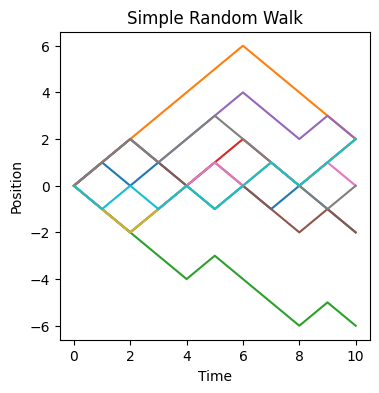

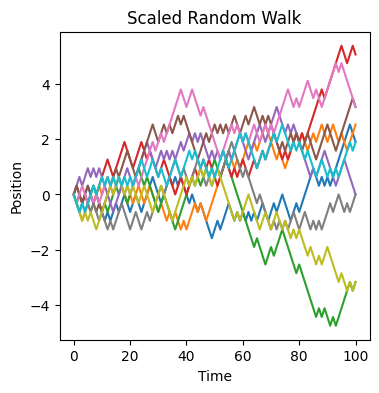

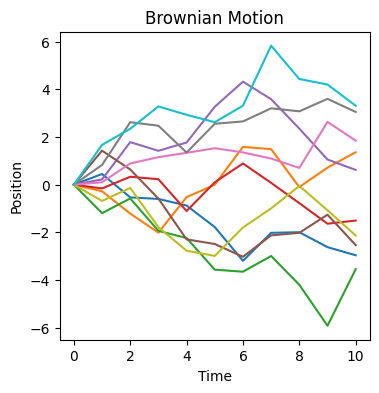

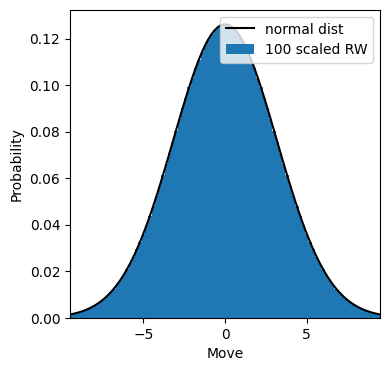

In [1]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def generate_simple_random_walk(M, t):
    """Generates simple random walk paths."""
    random_walk = [-1, 1]
    steps = np.random.choice(random_walk, size=(M, t)).T
    origin = np.zeros((1, M))
    return np.concatenate([origin, steps]).cumsum(axis=0)

def plot_paths(paths, title, xlabel, ylabel):
    """Plots the paths of random walks or Brownian motion with specified size."""
    plt.figure(figsize=(4, 4))
    plt.plot(paths)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def quadratic_variation(path):
    """Calculates the quadratic variation of a path."""
    return round(np.square(path[:-1] - path[1:]).sum(), 3)

def variance(path):
    """Calculates the variance of a path."""
    return round(np.var(path, axis=0), 3)

def generate_scaled_random_walk(M, t, n):
    """Generates scaled random walk paths."""
    random_walk = [-1, 1]
    steps = (1 / np.sqrt(n)) * np.random.choice(random_walk, size=(M, t * n)).T
    origin = np.zeros((1, M))
    return np.concatenate([origin, steps]).cumsum(axis=0)

def generate_brownian_motion(M, t, n):
    """Generates Brownian motion paths."""
    dt = t / n
    steps = np.random.normal(0, np.sqrt(dt), size=(M, n)).T
    origin = np.zeros((1, M))
    return np.concatenate([origin, steps]).cumsum(axis=0)

def plot_probability_distribution(n, t):
    """Plots the probability distribution and compares it to normal distribution with specified size."""
    plt.figure(figsize=(4, 4))
    def nCr(n, k):
        f = math.factorial
        return f(n) / (f(k) * f(n - k))

    perms = [nCr(n * t, k) * (0.5) ** (n * t) for k in range(int(n * t) + 1)]
    outcomes = 1 / np.sqrt(n) * np.arange(-n * t, n * t + 1, 2)

    plt.bar(outcomes, [perm / (outcomes[1] - outcomes[0]) for perm in perms], outcomes[1] - outcomes[0],
            label='{0} scaled RW'.format(n))
    x = np.linspace(-3 * np.sqrt(t), 3 * np.sqrt(t), 100)
    plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-', label='normal dist')
    plt.xlim(-3 * np.sqrt(t), 3 * np.sqrt(t))
    plt.ylabel("Probability")
    plt.xlabel("Move")
    plt.legend()
    plt.show()

# Main execution
if __name__ == "__main__":
    M = 10
    t = 10

    # Simple Random Walk
    rw_paths = generate_simple_random_walk(M, t)
    plot_paths(rw_paths, "Simple Random Walk", "Time", "Position")

    # Scaled Random Walk
    n = 10
    srw_paths = generate_scaled_random_walk(M, t, n)
    plot_paths(srw_paths, "Scaled Random Walk", "Time", "Position")

    # Brownian Motion
    bm_paths = generate_brownian_motion(M, t, n)
    plot_paths(bm_paths, "Brownian Motion", "Time", "Position")

    # Probability Distribution
    n = 100
    plot_probability_distribution(n, t)
